In [1]:
import pandas as pd
import numpy as np

The results are based on two values, one in Colorado and one in Washington.

In [41]:
def get_case_solar(filename, total=0):
    # df = pd.read_csv('wa-pv-2006/DA_47.45_-121.95_2006_UPV_50MW_60_Min.csv')
    df = pd.read_csv(filename)
    # print(df['Power(MW)'].sum())
    total += df['Power(MW)'].sum()
    vals = df['Power(MW)'].to_numpy()
    # vals = np.sort(vals) # / total
    # vals = np.array(vals[::-1])
    # vals = np.cumsum(vals)
    return vals, total

filenames = [os.path.join('tx-pv-2006', f) for f in os.listdir('tx-pv-2006') if f.startswith('DA')]
# ['tx-pv-2006/DA_32.45_-94.85_2006_DPV_35MW_60_Min.csv', 'tx-pv-2006/DA_34.95_-101.75_2006_DPV_27MW_60_Min.csv', 'tx-pv-2006']
# print(filenames)

valsplot_solar = []
t = 0
for f in filenames:
    v, t = get_case_solar(f, total=t)
    # print(v)
    # print(t)
    # print(v.shape)
    if v.shape[0] > 0:
        valsplot_solar.append(v)
    else:
        continue
        # print(f'{f} is wrong')
    # print('----')

valsplot_solar = np.stack(valsplot_solar)
# print(valsplot_solar.shape)
valsplot_solar = np.sum(valsplot_solar, axis=0)
valsplot_solar = np.sort(valsplot_solar) / t
valsplot_solar = np.array(valsplot_solar[::-1])
valsplot_solar = np.cumsum(valsplot_solar)


valsplot_solar = np.stack([valsplot_solar])
print(valsplot_solar)

[[4.46316601e-04 8.91054872e-04 1.33202269e-03 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [42]:
def get_case_wind(filename):
    # df = pd.read_csv('wa-pv-2006/DA_47.45_-121.95_2006_UPV_50MW_60_Min.csv')
    df = pd.read_csv(filename)
    total = df['Total Wind Output, MW'].sum()
    vals = df['Total Wind Output, MW'].to_numpy()
    vals = np.sort(vals) / total
    vals = np.array(vals[::-1])
    vals = np.cumsum(vals)
    return vals

filenames = ['../winddata/texas_wind_output.csv']
valsplot_wind = []
for f in filenames:
    valsplot_wind.append(get_case_wind(f))

valsplot_wind = np.stack(valsplot_wind)
print(valsplot_wind)

[[2.55747929e-04 5.11313302e-04 7.66187571e-04 ... 9.99993741e-01
  9.99997157e-01 1.00000000e+00]]


SOLAR
80% of the productive hours are in the 28.8% most productive hours
50.6% of the hours have no production
WIND
80% of the productive hours are in the 58.9% most productive hours
0.0% of the hours have no production


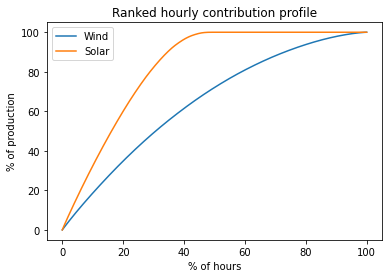

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
for i in range(len(valsplot_solar)):
    x = np.array(list(range(8760)))
    xpct = 100. * x / 8760.
    plt.plot(xpct, 100. * valsplot_wind[i], label='Wind')
    plt.plot(xpct, 100. * valsplot_solar[i], label='Solar')
    plt.title('Ranked hourly contribution profile')
    plt.ylabel('% of production')
    plt.xlabel('% of hours')
    plt.legend(loc="upper left")
fig.savefig('solarwind.png', bbox_inches='tight')

for i in range(len(valsplot_solar)):
    print('SOLAR')
    print(f'80% of the productive hours are in the {100 * float(np.where(valsplot_solar[i] > 0.8)[0][0]) / 8760.:.1f}% most productive hours')
    print(f'{100 * float(8760 - np.where(valsplot_solar[i] > 0.999999999)[0][0]) / 8760.:.1f}% of the hours have no production')

for i in range(len(valsplot_wind)):
    print('WIND')
    print(f'80% of the productive hours are in the {100 * float(np.where(valsplot_wind[i] > 0.8)[0][0]) / 8760.:.1f}% most productive hours')
    print(f'{100 * float(8760 - np.where(valsplot_wind[i] > 0.999999999)[0][0]) / 8760.:.1f}% of the hours have no production')

<Figure size 432x288 with 0 Axes>

In [ ]:
year = 0
copper_consumption = 0  # MT
copper_reserves = 5700 # MT
while i < total:
    copper_consumption += 25 * (1 + j*0.5)
    year += 1
print(year)